# Phishing Email Classification using OpenAI embeddings

This notebook uses OpenAI embeddings to improve the performance of phishing email classification.


## Required imports

In [56]:
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, \
    precision_recall_curve, confusion_matrix

## Dataset
Dataset preparation is done here: [data_preparation.ipynb](https://github.com/mikdrob/PhishingEmailMLModel/blob/main/jupiter/notebook/embeddings_create.ipynb)

In [46]:
train_df = pd.read_csv('../dataset/input/embeddings_train.csv')
test_df = pd.read_csv('../dataset/input/embeddings_test.csv')

train_values = train_df.embedding.apply(eval).apply(np.array)
test_values = test_df.embedding.apply(eval).apply(np.array)

X_train = list(train_values)
y_train = train_df['is_phishing']
X_test = list(test_values)
y_test = test_df['is_phishing']

## Feature Extraction

The notebook uses OpenAI's pre-trained GPT-3 embeddings to represent each email as a sequence of embedded tokens. Each token is a vector in high-dimensional space that captures the semantic meaning of the corresponding word

In [47]:
# Train a random forest classifier on the training set
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
# Make predictions on the test set
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

In [54]:
# Evaluate the performance of the classifier using various metrics
report = classification_report(y_test, preds, digits=4)
accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, probas[:, 1])

print("Random Forest Using OpenAI Embeddings Classification Report:\n", report)
print("Accuracy: {:.5f}".format(accuracy))
print("F1 Score: {:.5f}".format(f1))
print("ROC AUC Score: {:.5f}".format(roc_auc))

Random Forest Using OpenAI Embeddings Classification Report:
               precision    recall  f1-score   support

       False     0.9861    1.0000    0.9930       497
        True     1.0000    0.9320    0.9648       103

    accuracy                         0.9883       600
   macro avg     0.9931    0.9660    0.9789       600
weighted avg     0.9885    0.9883    0.9882       600

Accuracy: 0.98833
F1 Score: 0.96482
ROC AUC Score: 0.99975


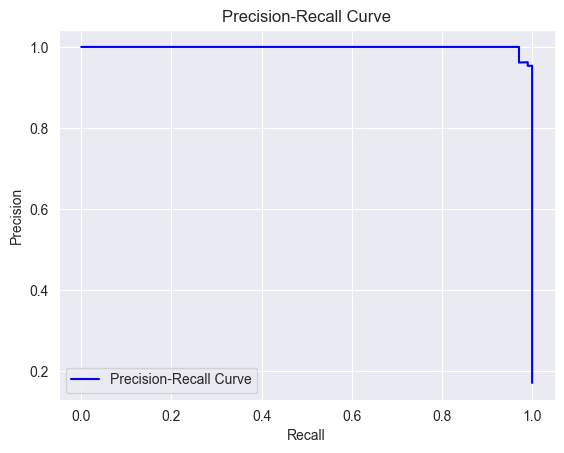

In [50]:
# Compute precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probas[:, 1])

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [51]:
# Compute the false positive rate and true positive rate for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = roc_auc_score(y_test, probas[:, 1])

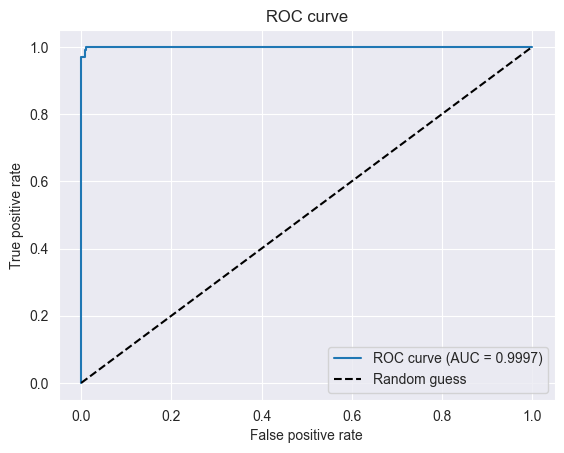

In [52]:
# Plot the ROC curve
plt.plot(fpr, tpr, linestyle='-', label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

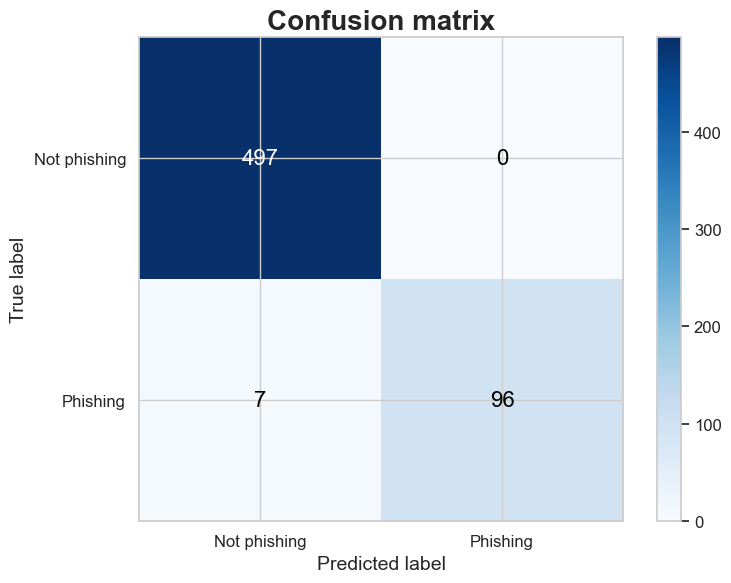

In [57]:
# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

# Set up plot settings
seaborn.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion matrix', fontsize=20, fontweight='bold')
ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Not phishing', 'Phishing'], fontsize=12)
ax.set_yticklabels(['Not phishing', 'Phishing'], fontsize=12)

# Add text annotations
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(cm[i, j], ',d'), ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=12)

# Show plot
plt.tight_layout()
plt.show()

## Conclusion
By using OpenAI embeddings, the Random Forest model achieved an accuracy of 0.98833 and an F1 score of 0.96482. The model performed well in predicting both the majority class (False) with a precision of 0.9861, recall of 1.0000, and F1 score of 0.9930, and the minority class (True) with a precision of 1.0000, recall of 0.9320, and F1 score of 0.9648. The ROC AUC score was 0.99975. These results show dramatic improvements over other approaches such as GloVe embeddings or standard Random Forest model.